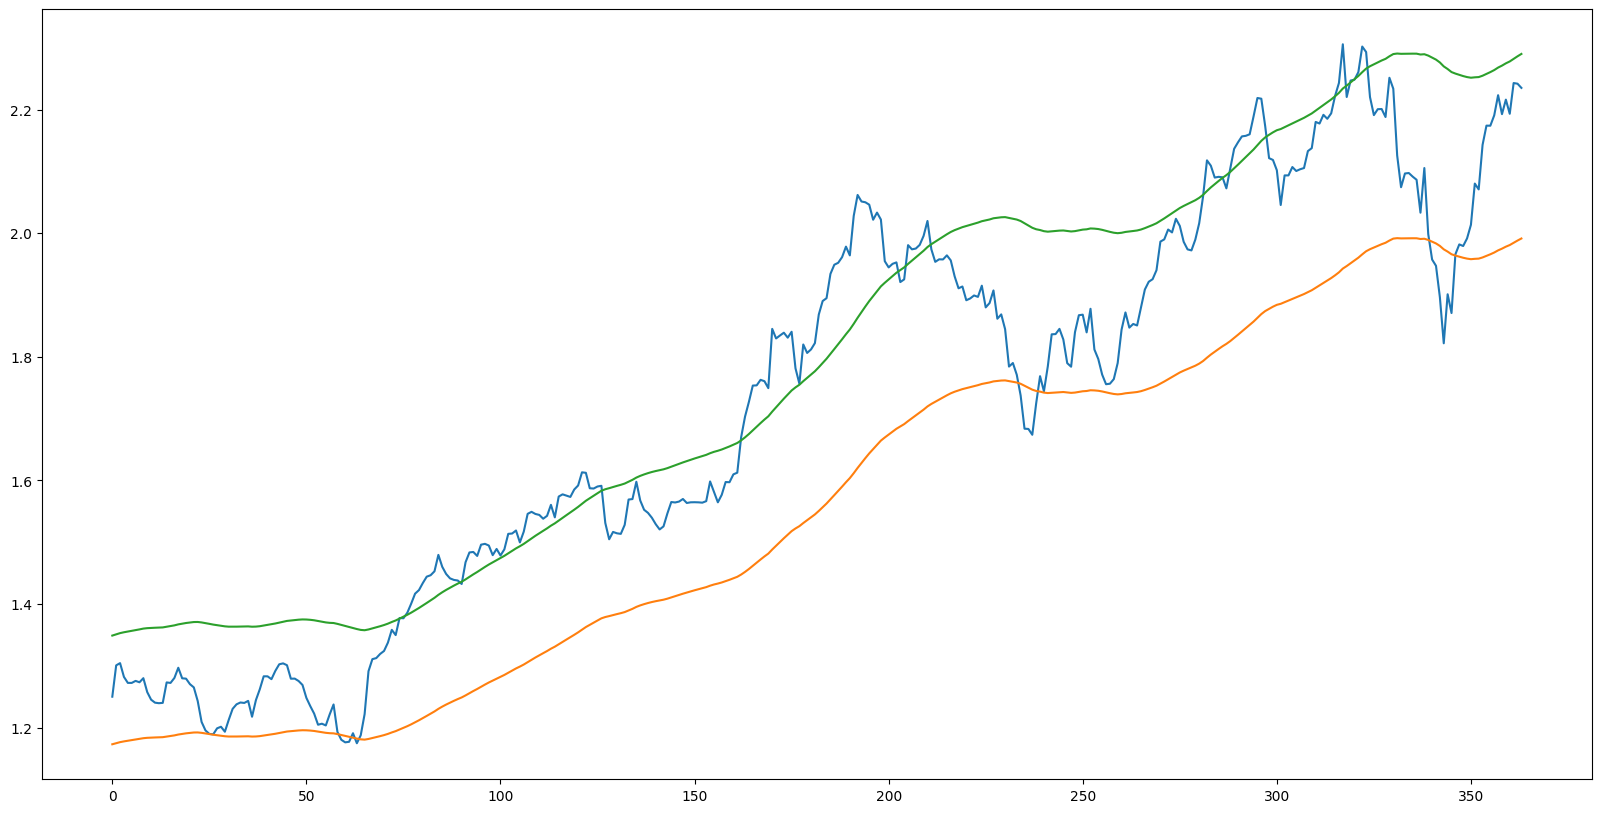

In [15]:
import asyncio

import numpy as np
from matplotlib import pyplot

from backend import crypto, stock
from backend.position import calc_ema, calc_k

weights = [
    0.099,
    0.091,
    0.179,
    0.101,
    0.180,
    0.131,
    0.117,
    0.101,
]
w = 91
scale = 364
positions = [
    ('c', 'ETH'),
    ('u', 'COIN'),
    ('t', '2330'),
    ('t', '3661'),
    ('u', 'AAPL'),
    ('u', 'NVDA'),
    ('u', 'TSLA'),
    ('u', 'PLTR'),
]

n = scale + calc_k(w) - 1
P = np.array(
    await asyncio.gather(
        *[
            (crypto.get_prices(p[1], n) if p[0] == 'c' else stock.get_prices(*p, n))
            for p in positions
        ]
    )
)
R = weights @ (P / P[:, [0]])
B = calc_ema(R, 2 / (w + 1), calc_k(w))
R = R[-scale:]

pyplot.figure(figsize=(20, 10))
pyplot.plot(R)
pyplot.plot(B)
pyplot.plot(B * 1.15)